Question 1

In [54]:
import pandas as pd

In [55]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data.csv')

In [56]:
# Print the data types of all columns in the DataFrame
print("Data Types of All Columns:")
print(df.dtypes)

Data Types of All Columns:
opportunity_id          int64
content_id              int64
vol_requests            int64
event_time              int64
title                  object
hits                    int64
summary                object
is_priority            object
category_id           float64
category_desc          object
amsl                  float64
amsl_unit             float64
org_title              object
org_content_id          int64
addresses_count         int64
locality               object
region                 object
postalcode            float64
primary_loc           float64
display_url            object
recurrence_type        object
hours                   int64
created_date           object
last_modified_date     object
start_date_date        object
end_date_date          object
status                 object
Latitude              float64
Longitude             float64
Community Board       float64
Community Council     float64
Census Tract          float64
BIN          

In [57]:
# Example of columns that might be incorrectly typed:
# - 'opportunity_id', 'content_id', 'vol_requests', 'event_time', 'hits', 'is_priority', 'category_id', 
# 'org_content_id', 'addresses_count' could be integers but might be stored as objects
# - 'created_date', 'last_modified_date', 'start_date_date', 'end_date_date' could be dates but might be stored as objects

# Convert numeric columns stored as objects to integers
numeric_cols = ['opportunity_id', 'content_id', 'vol_requests', 'event_time', 'hits', 
                'is_priority', 'category_id', 'org_content_id', 'addresses_count']


In [58]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [59]:
# Convert date columns stored as objects to datetime
date_cols = ['created_date', 'last_modified_date', 'start_date_date', 'end_date_date']

In [60]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [61]:
# Print the updated data types after conversion
print("\nUpdated Data Types After Conversion:")
print(df.dtypes)


Updated Data Types After Conversion:
opportunity_id                 int64
content_id                     int64
vol_requests                   int64
event_time                     int64
title                         object
hits                           int64
summary                       object
is_priority                  float64
category_id                  float64
category_desc                 object
amsl                         float64
amsl_unit                    float64
org_title                     object
org_content_id                 int64
addresses_count                int64
locality                      object
region                        object
postalcode                   float64
primary_loc                  float64
display_url                   object
recurrence_type               object
hours                          int64
created_date          datetime64[ns]
last_modified_date    datetime64[ns]
start_date_date       datetime64[ns]
end_date_date         datetime64[ns]


In [62]:
clear

Question 2

In [63]:
import pandas as pd

In [64]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data.csv')

In [65]:
# Identify and list all columns that have missing values
missing_values = df.isnull().sum()
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
is_priority          603
category_id           48
category_desc         48
amsl                 665
amsl_unit            665
locality              70
postalcode             6
primary_loc          665
Latitude             665
Longitude            665
Community Board      665
Community Council    665
Census Tract         665
BIN                  665
BBL                  665
NTA                  665
dtype: int64


In [66]:
# Remove columns with at least 3 missing values
cols_to_remove = missing_values[missing_values >= 3].index
df = df.drop(columns=cols_to_remove)
print(f"\nRemoved Columns: {list(cols_to_remove)}")



Removed Columns: ['is_priority', 'category_id', 'category_desc', 'amsl', 'amsl_unit', 'locality', 'postalcode', 'primary_loc', 'Latitude', 'Longitude', 'Community Board', 'Community Council', 'Census Tract', 'BIN', 'BBL', 'NTA']


In [67]:
# For columns with missing values but fewer than 3, fill the missing values
cols_to_fill = missing_values[(missing_values > 0) & (missing_values < 3)].index

In [68]:
for col in cols_to_fill:
    if df[col].dtype in ['int64', 'float64']:  # Numerical columns
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in '{col}' with median value {median_value}.")
    else:  # Categorical columns
        most_frequent_value = df[col].mode()[0]
        df[col].fillna(most_frequent_value, inplace=True)
        print(f"Filled missing values in '{col}' with most frequent value '{most_frequent_value}'.")

In [69]:
# Verify that all missing values have been handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
opportunity_id        0
content_id            0
vol_requests          0
event_time            0
title                 0
hits                  0
summary               0
org_title             0
org_content_id        0
addresses_count       0
region                0
display_url           0
recurrence_type       0
hours                 0
created_date          0
last_modified_date    0
start_date_date       0
end_date_date         0
status                0
dtype: int64


In [70]:
clear

Question 3

In [71]:
import pandas as pd

In [72]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data.csv')

In [73]:
# Check the initial data types
print("Initial Data Types:")
print(df.dtypes)

Initial Data Types:
opportunity_id          int64
content_id              int64
vol_requests            int64
event_time              int64
title                  object
hits                    int64
summary                object
is_priority            object
category_id           float64
category_desc          object
amsl                  float64
amsl_unit             float64
org_title              object
org_content_id          int64
addresses_count         int64
locality               object
region                 object
postalcode            float64
primary_loc           float64
display_url            object
recurrence_type        object
hours                   int64
created_date           object
last_modified_date     object
start_date_date        object
end_date_date          object
status                 object
Latitude              float64
Longitude             float64
Community Board       float64
Community Council     float64
Census Tract          float64
BIN                 

In [74]:
# Choose the column to convert - in this case, 'hits'
# Convert the 'hits' column to an integer
df['hits'] = pd.to_numeric(df['hits'], errors='coerce')

In [75]:
# Verify the conversion by printing the updated data types
print("\nUpdated Data Types After Conversion:")
print(df.dtypes)


Updated Data Types After Conversion:
opportunity_id          int64
content_id              int64
vol_requests            int64
event_time              int64
title                  object
hits                    int64
summary                object
is_priority            object
category_id           float64
category_desc          object
amsl                  float64
amsl_unit             float64
org_title              object
org_content_id          int64
addresses_count         int64
locality               object
region                 object
postalcode            float64
primary_loc           float64
display_url            object
recurrence_type        object
hours                   int64
created_date           object
last_modified_date     object
start_date_date        object
end_date_date          object
status                 object
Latitude              float64
Longitude             float64
Community Board       float64
Community Council     float64
Census Tract          float64
BI

In [76]:
clear

Question 4

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data.csv')

In [79]:
# Calculate the distribution of classes in the 'category_desc' column
class_distribution = df['category_desc'].value_counts()
print("Class Distribution in 'category_desc':")
print(class_distribution)

Class Distribution in 'category_desc':
category_desc
Strengthening Communities    307
Helping Neighbors in Need    119
Education                     92
Health                        52
Environment                   32
Emergency Preparedness        15
Name: count, dtype: int64


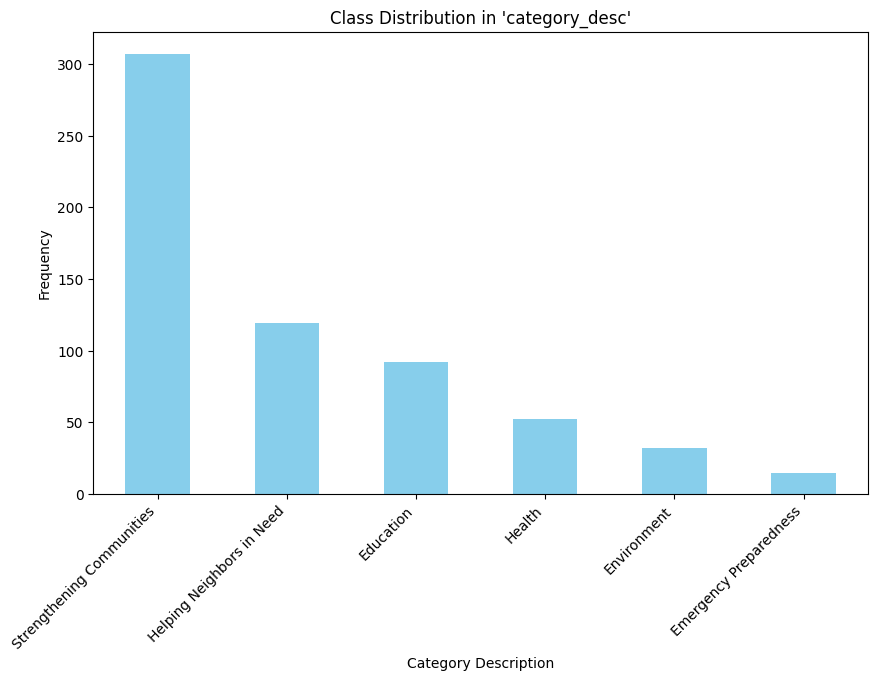

In [80]:
# Create a bar plot to visualize the class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title("Class Distribution in 'category_desc'")
plt.xlabel("Category Description")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

In [83]:
clear

Question 5

In [89]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Load the dataset
df = pd.read_csv('data.csv')

# Define the class column
class_column = 'category_desc'  # Replace with your actual class column name

# Check for missing values in the class column
missing_values = df[class_column].isna().sum()
print(f"Missing values in {class_column}: {missing_values}")

# Remove rows with missing values in the class column
df = df.dropna(subset=[class_column])

# Verify that there are no more missing values
missing_values_after = df[class_column].isna().sum()
print(f"Missing values after removal: {missing_values_after}")

# Calculate class distribution
class_distribution = df[class_column].value_counts(normalize=True)
print("Original Class Distribution:")
print(class_distribution)

# Define the stratified sampling splitter
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform stratified sampling
for train_index, test_index in splitter.split(df, df[class_column]):
    df_sampled = df.iloc[test_index]

# Calculate class distribution in the sampled DataFrame
sampled_class_distribution = df_sampled[class_column].value_counts(normalize=True)
print("\nSampled Class Distribution:")
print(sampled_class_distribution)

# Compare with the original distribution
print("\nComparison of Class Distributions:")
comparison = pd.DataFrame({
    'Original': class_distribution,
    'Sampled': sampled_class_distribution
}).fillna(0)
print(comparison)


Missing values in category_desc: 48
Missing values after removal: 0
Original Class Distribution:
category_desc
Strengthening Communities    0.497569
Helping Neighbors in Need    0.192869
Education                    0.149109
Health                       0.084279
Environment                  0.051864
Emergency Preparedness       0.024311
Name: proportion, dtype: float64

Sampled Class Distribution:
category_desc
Strengthening Communities    0.500000
Helping Neighbors in Need    0.193548
Education                    0.153226
Health                       0.080645
Environment                  0.048387
Emergency Preparedness       0.024194
Name: proportion, dtype: float64

Comparison of Class Distributions:
                           Original   Sampled
category_desc                                
Strengthening Communities  0.497569  0.500000
Helping Neighbors in Need  0.192869  0.193548
Education                  0.149109  0.153226
Health                     0.084279  0.080645
Environment 